In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import cmocean as cmo

# from popurri import spectrograph as spc
from popurri import spectrum as spectrum
from popurri import plotutils

# mpl.rcdefaults()
plotutils.mpl_custom_basic()
plotutils.mpl_size_same(font_size=18)

# Testing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
dirout = './plot_spectrum/'

## Single observation CARMENES VIS

In [63]:
filin = '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20160327T21h25m39s-sci-gtoc-vis_A.fits'
inst = 'carmvis'

# Read spectrum from filin
spec = spectrum.Spectrum(filin, inst, dirout=dirout)

# # Spectrum object variables
# vars(spec)

Plot the spectrum

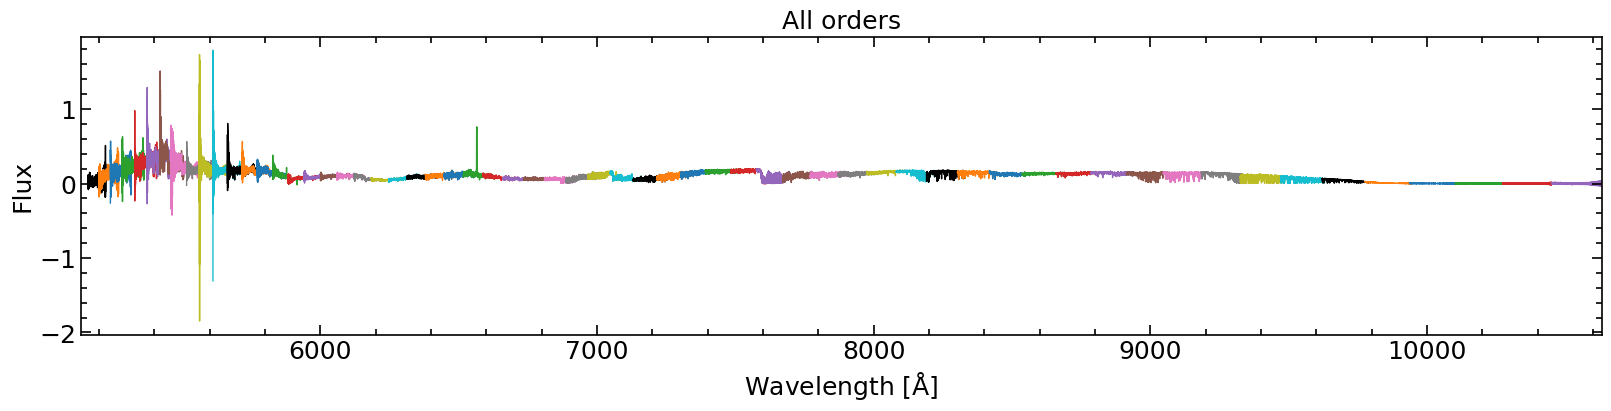

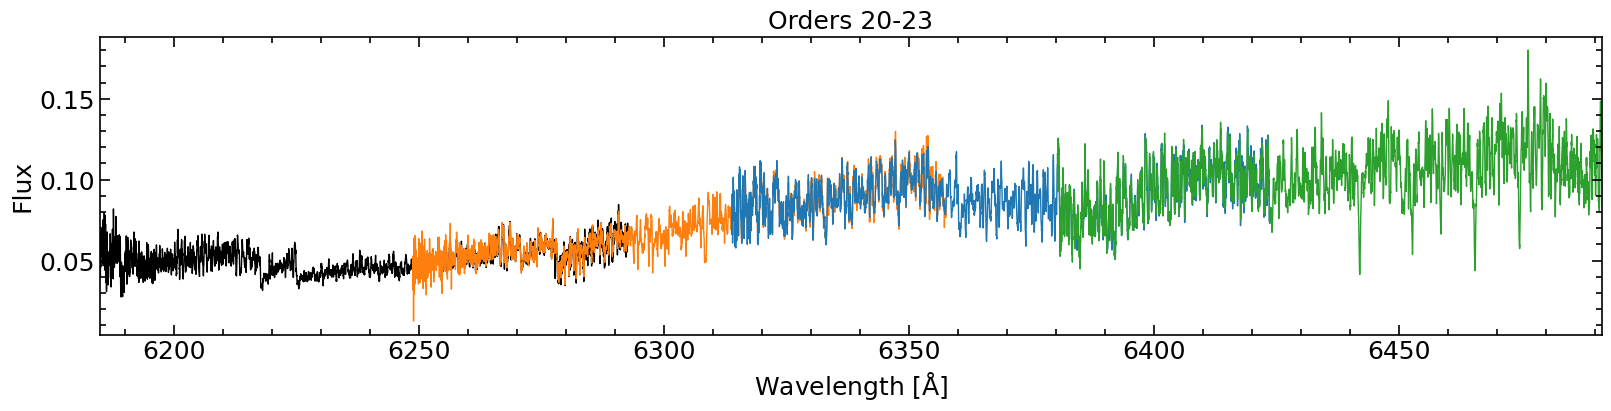

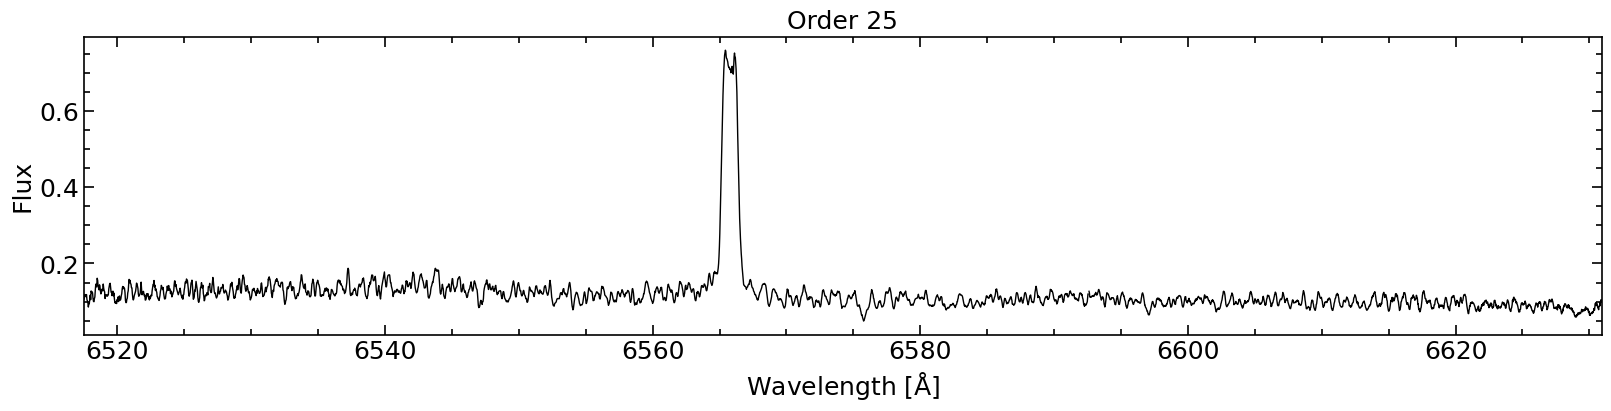

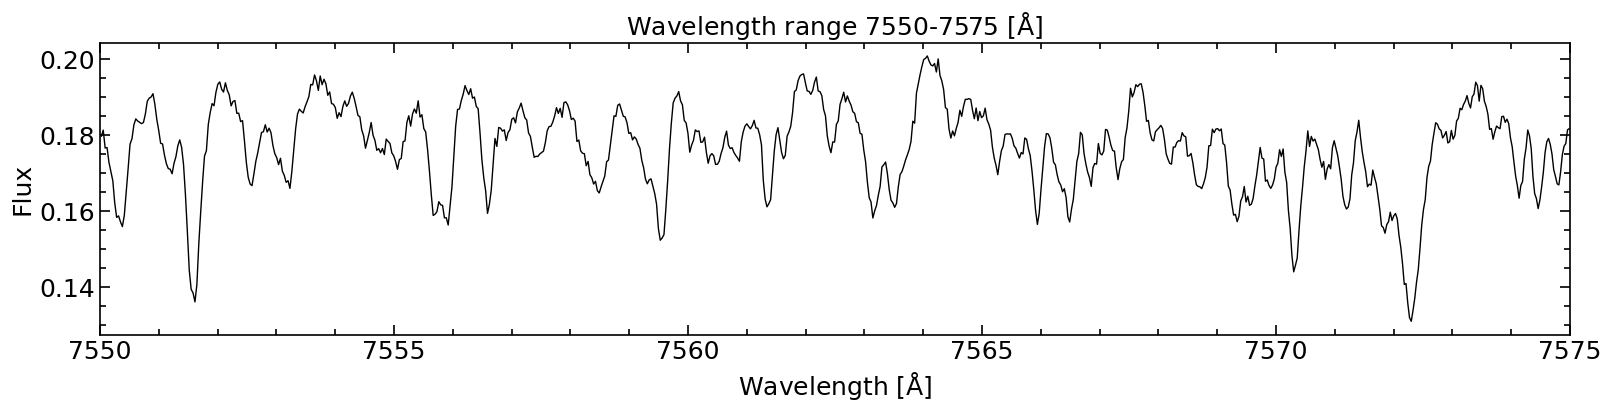

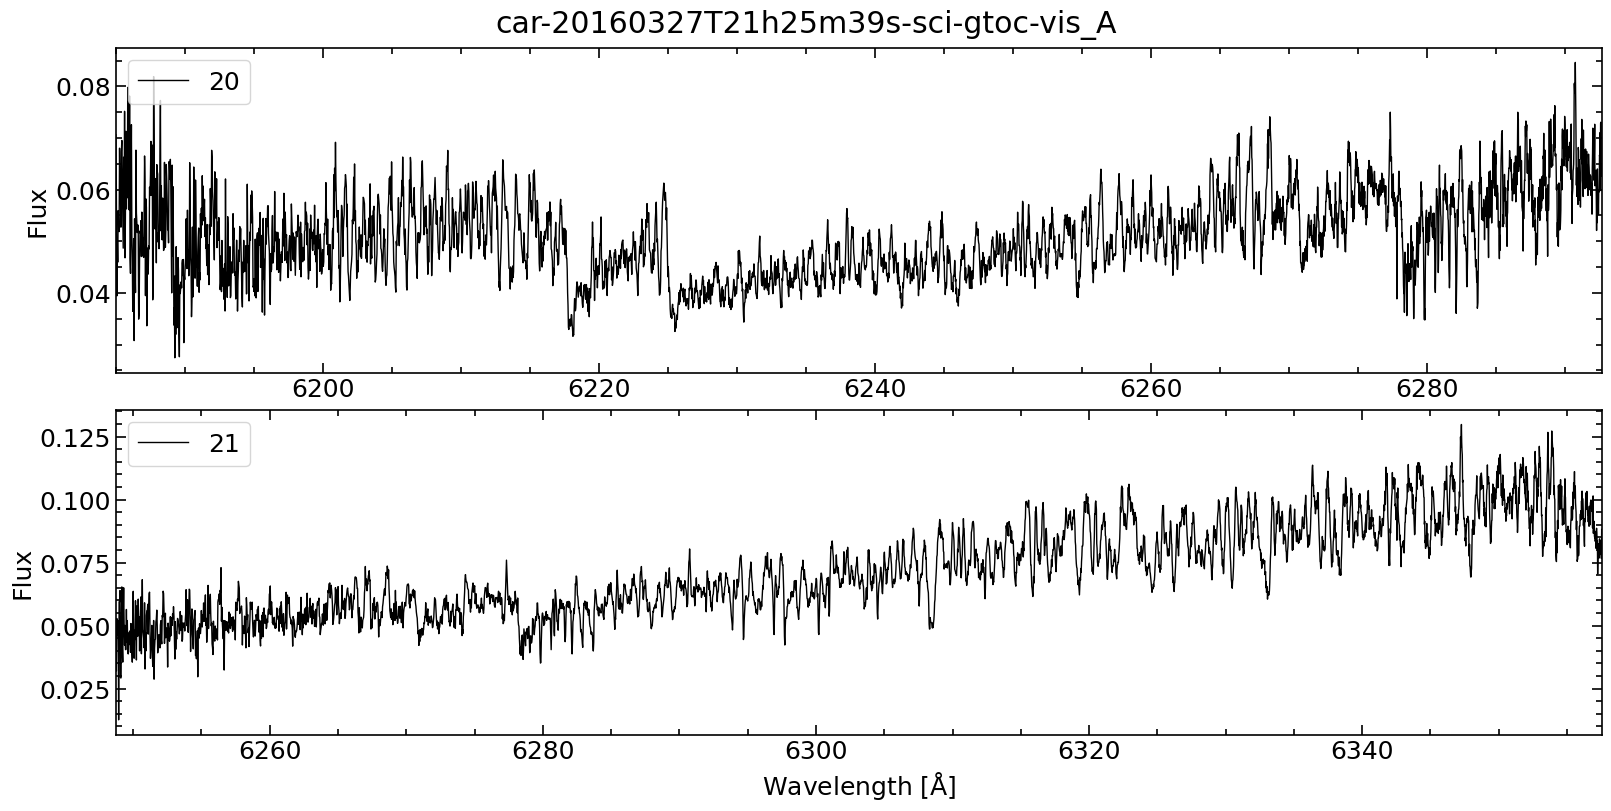

(None, None)

In [4]:
# Plot all orders
spec.fig_spectrum(title='All orders', sh=True, sv=False)

# Plot some of the central orders
spec.fig_spectrum(ords=spec.ords[20:24], title='Orders 20-23', sh=True, sv=False)

# Plot the order with Halpha
spec.fig_spectrum(ords=spec.ords[25], title='Order 25', sh=True, sv=False)

# Plot a specific wavelength range
spec.fig_spectrum(wmin=7550, wmax=7575, title='Wavelength range 7550-7575 $[\mathrm{\AA}]$', sh=True, sv=False)

# Plot 2 orders  on different panels
fig, ax = plt.subplots(2, 1, figsize=(16, 8), constrained_layout=True)
ax[0] = spec.plot_spectrum(ax=ax[0], ords=[20], legend=True, legendloc='upper left', xlabel='')
ax[1] = spec.plot_spectrum(ax=ax[1], ords=[21], legend=True, legendloc='upper left')
plt.suptitle(spec.filname)
plt.show(), plt.close()

## Single observation CARMENES NIR

Read a CARMENES NIR (`'carmnir'`) observation.
Note: Orders can be split into the two detectors (`ordcut`).

In [118]:
# Observation
inst = 'carmnir'
filin = '/Users/marina/work/data/carmenes_gto/caracal/CARM_NIR/J07446+035/car-20160924T05h04m12s-sci-gtoc-nir_A.fits'

# Read spectrum from filin
spec = spectrum.Spectrum(filin, inst, dirout=dirout, ordcut=True, saveordnoncut=True)
spec_nocut = spectrum.Spectrum(filin, inst, dirout=dirout, ordcut=False, saveordnoncut=False)

# # Spectrum object variables
# vars(spec)

Plot the spectrum.

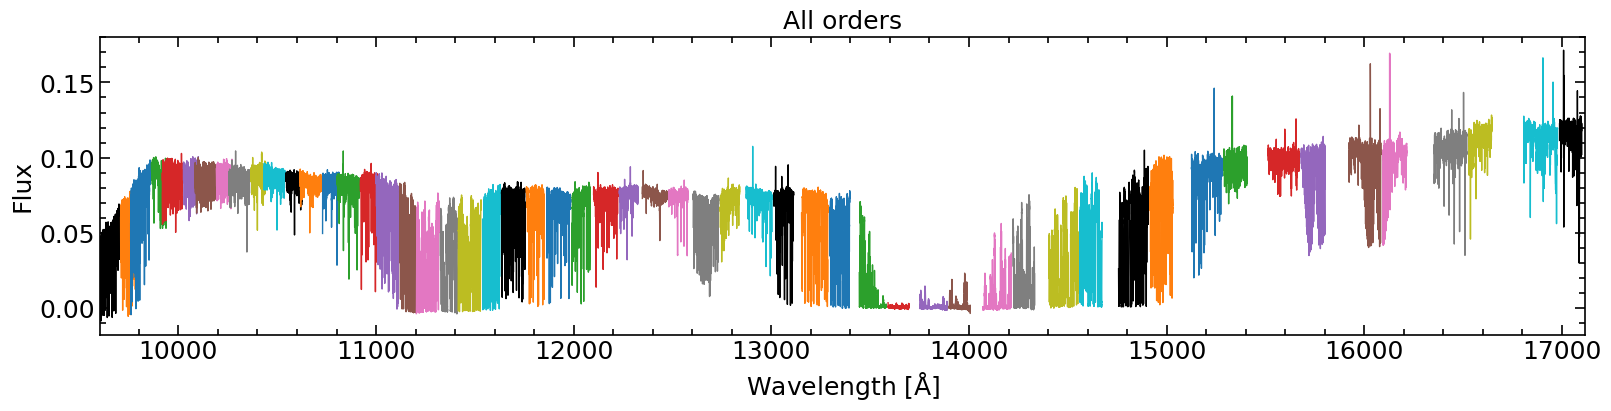

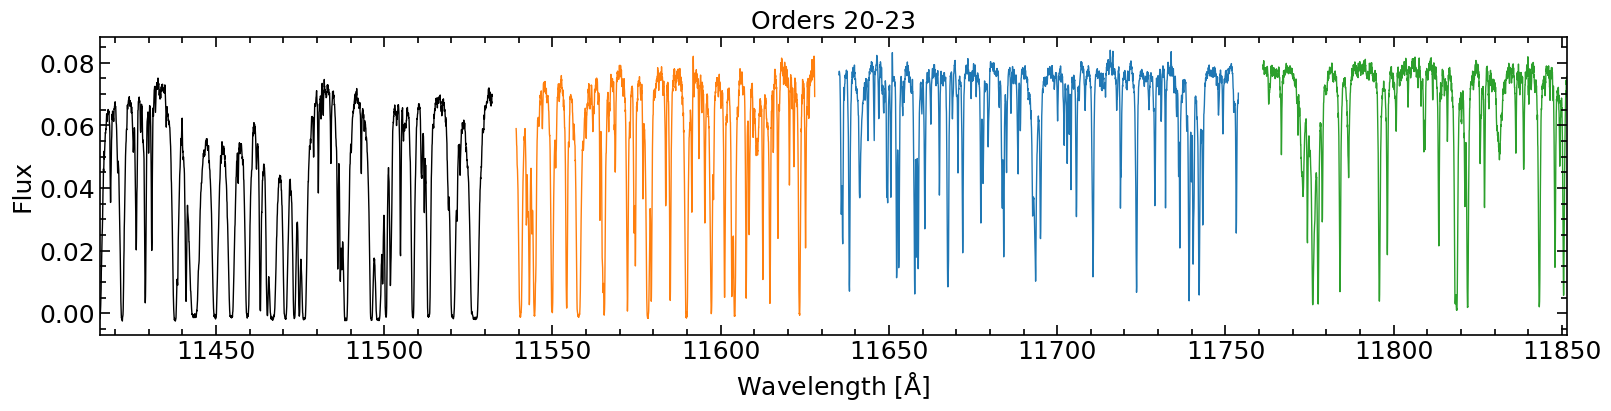

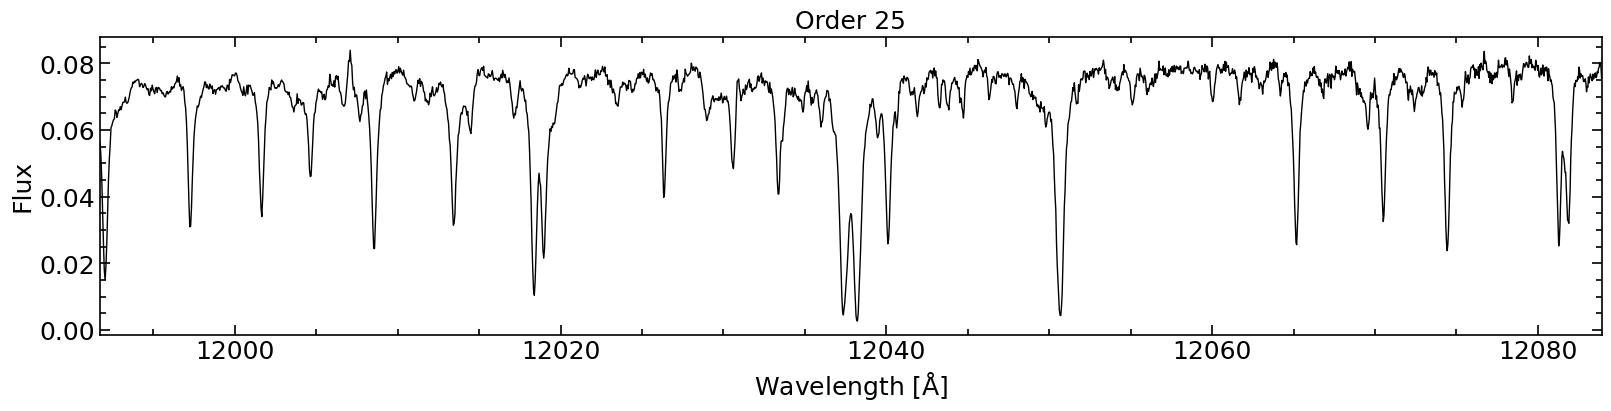

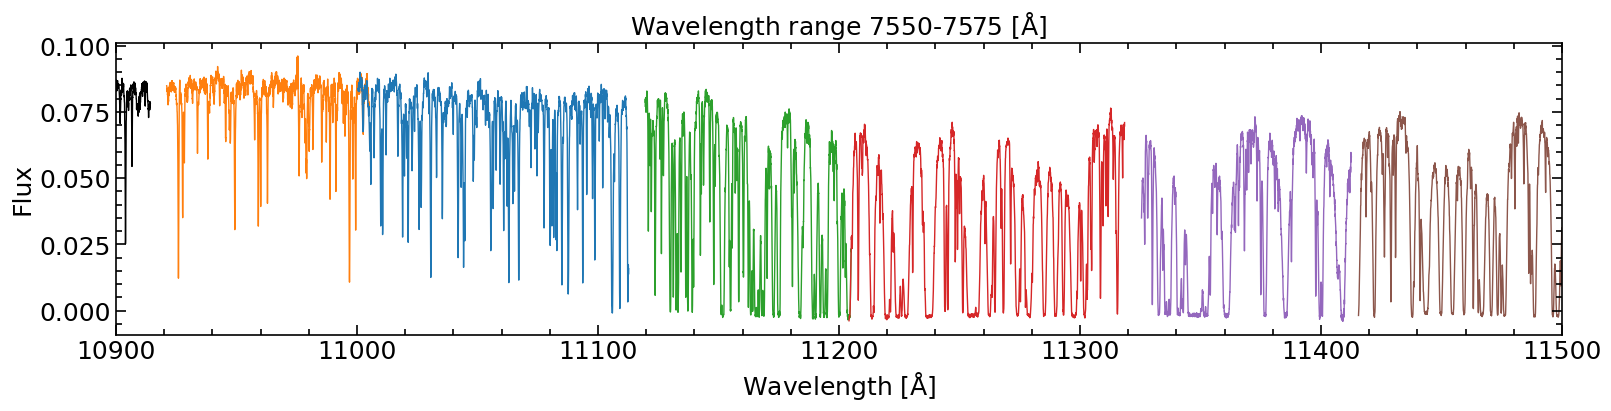

In [6]:
# Plot all orders
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, title='All orders')
plt.show()
plt.close()

# Plot some of the central orders
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, ords=spec.ords[20:24], title='Orders 20-23')
plt.show()
plt.close()

# Plot the order with Halpha
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, ords=spec.ords[25], title='Order 25')
plt.show()
plt.close()

# Plot a specific wavelength range
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, wmin=10900, wmax=11500, title='Wavelength range 7550-7575 $[\mathrm{\AA}]$')
plt.show()
plt.close()

Compare spectrum with orders cut and not cut.

Orders [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] total number of orders 56


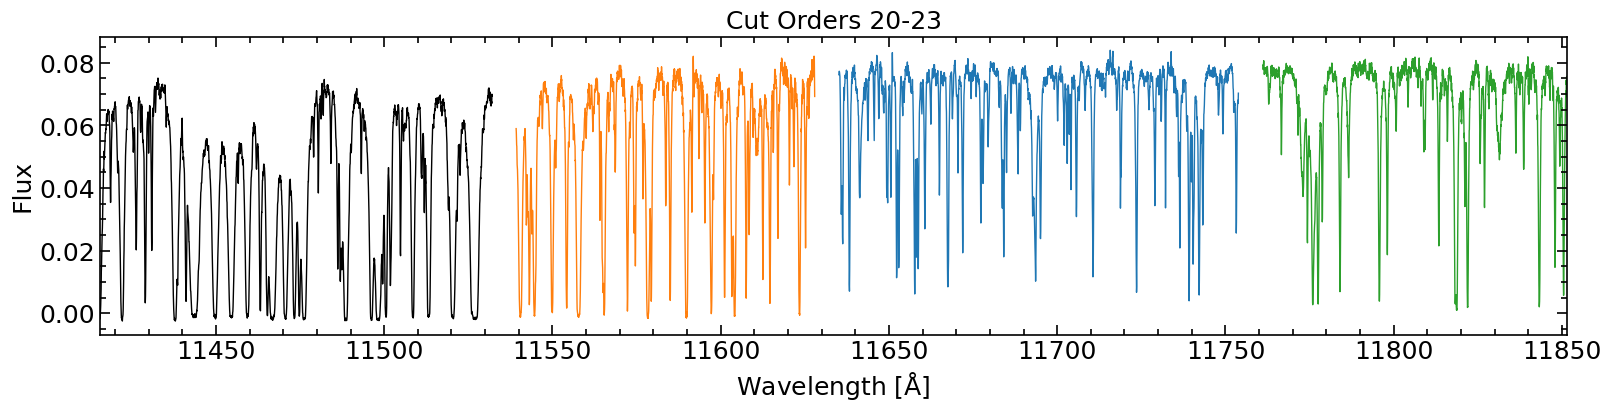

Orders [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] total number of orders 28


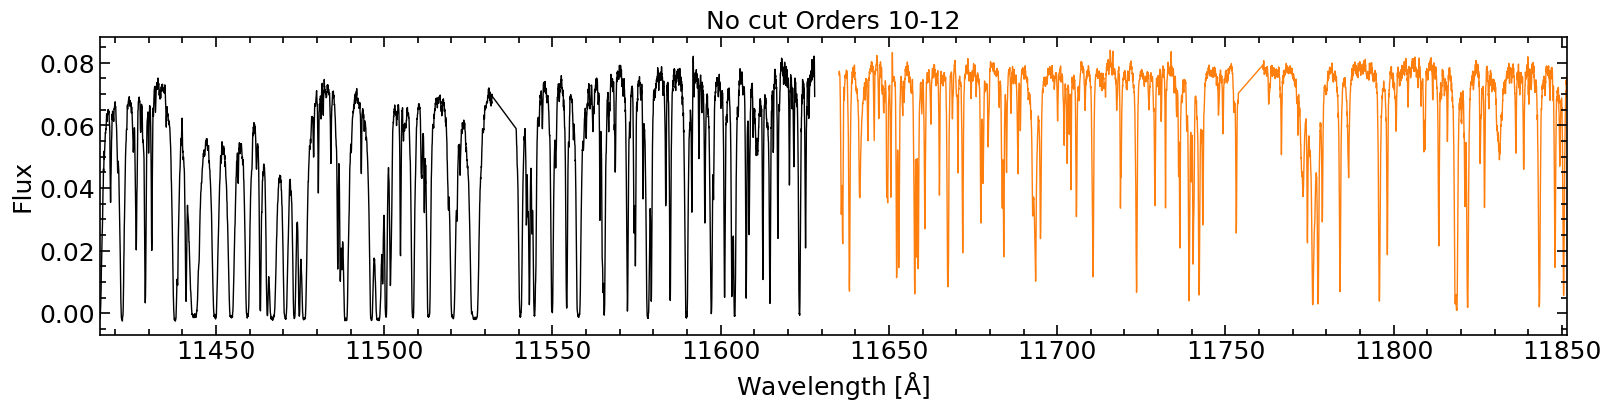

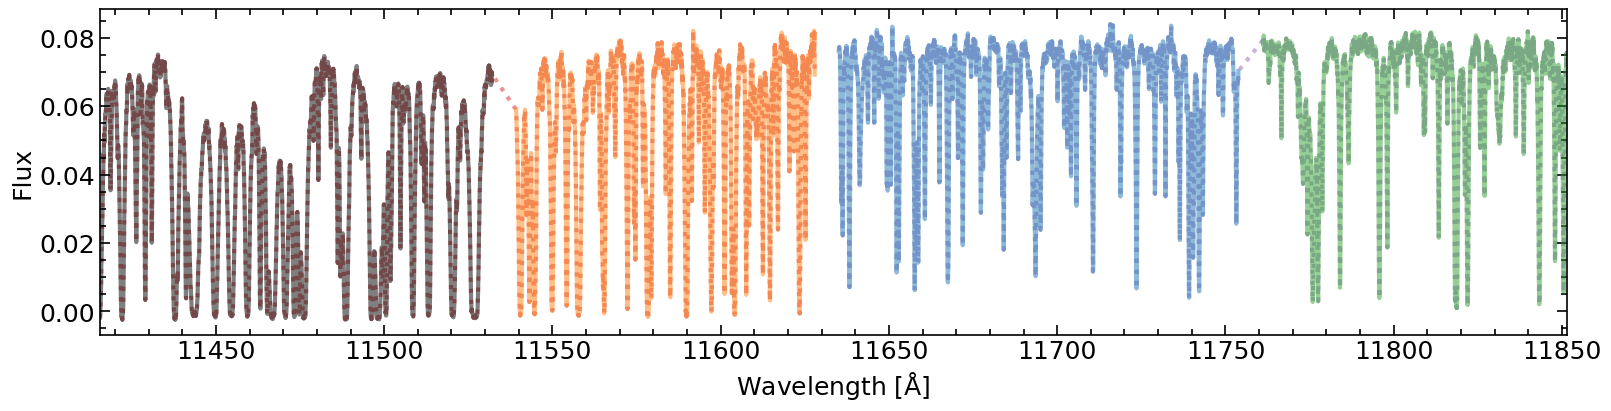

In [7]:
# Compare orders cut and nocut
print('Orders', spec.ords, 'total number of orders', len(spec.ords))
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, ords=spec.ords[20:24], title='Cut Orders 20-23')
plt.show()
plt.close()

print('Orders', spec_nocut.ords, 'total number of orders', len(spec_nocut.ords))
fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec_nocut.plot_spectrum(ax=ax, ords=spec.ords[10:12], title='No cut Orders 10-12')
plt.show()
plt.close()

fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
ax = spec.plot_spectrum(ax=ax, ords=spec.ords[20:24], lw=3, alpha=0.5, zorder=2)
ax = spec_nocut.plot_spectrum(ax=ax, ords=spec.ords[10:12], lw=3, linestyle=':', alpha=0.5, zorder=1)
plt.show()
plt.close()

Plot order map, compare cut and no cut (no cut has less orders).

Note that for the cut case, if we use the real order indexing, the y-axis is not correct (because 2 different cut orders have the same real index).

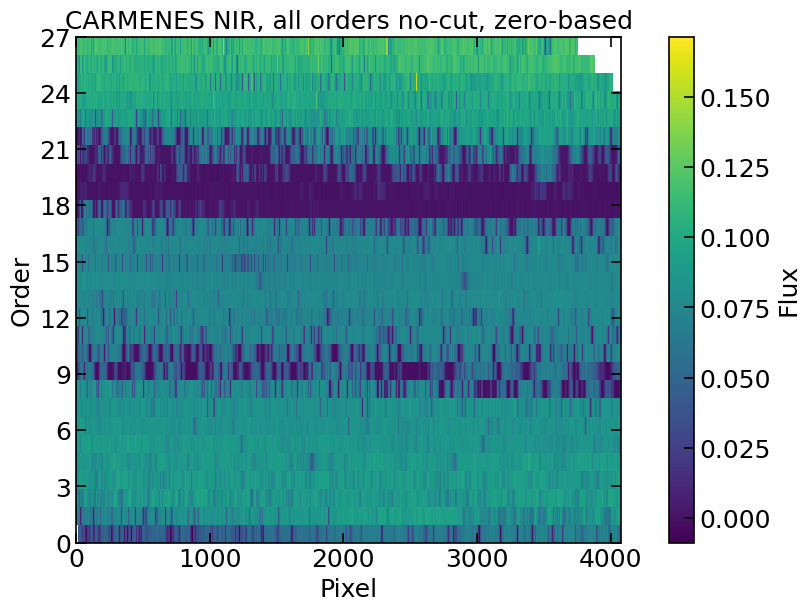

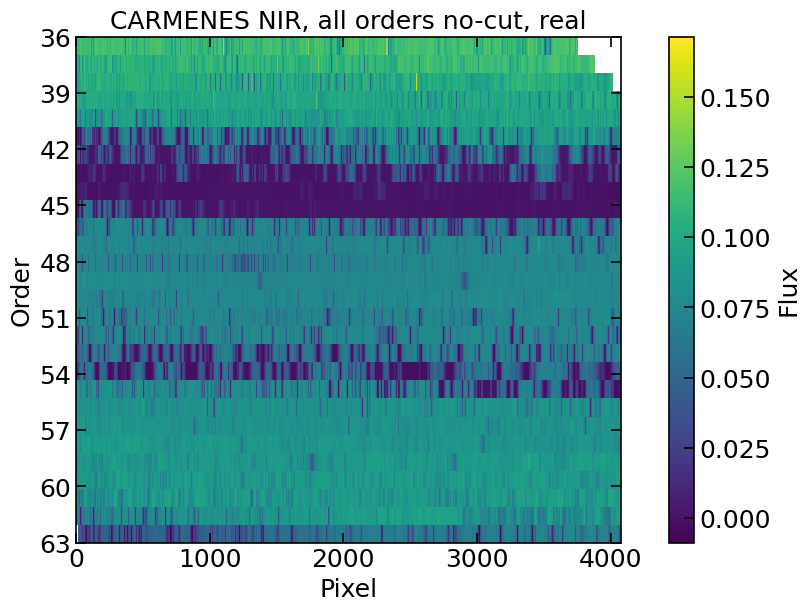

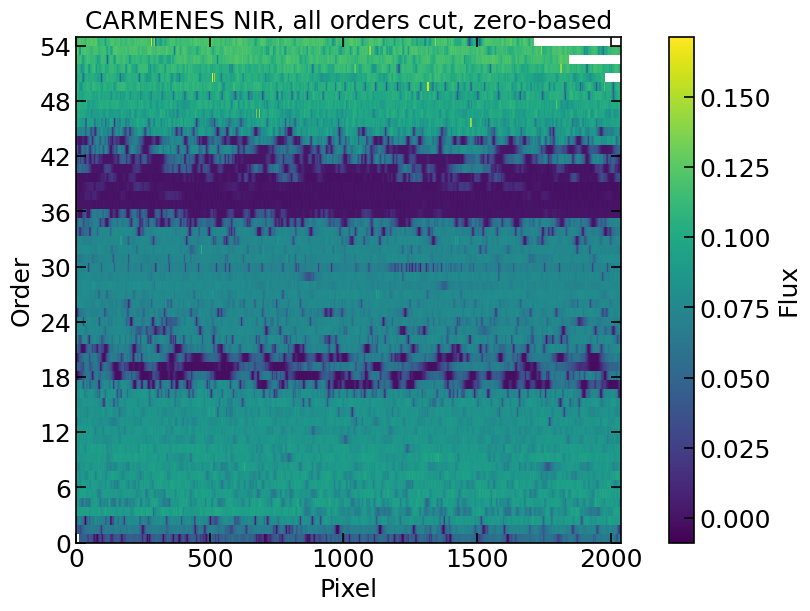

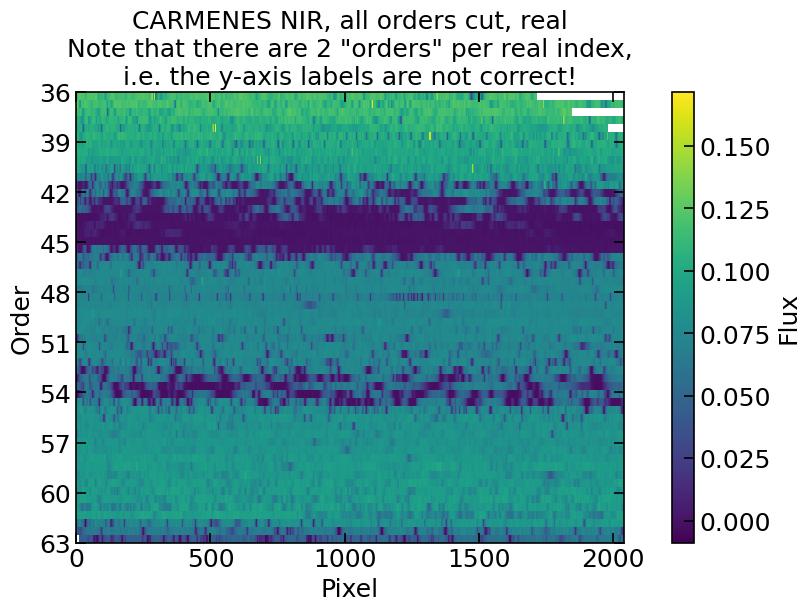

In [8]:
# Map of all orders flux
spec_nocut.fig_spectrum_map(title='CARMENES NIR, all orders no-cut, zero-based', sh=True, sv=False)

spec_nocut.fig_spectrum_map(ordtype='real', title='CARMENES NIR, all orders no-cut, real', sh=True, sv=False)

spec.fig_spectrum_map(title='CARMENES NIR, all orders cut, zero-based', sh=True, sv=False)

spec.fig_spectrum_map(ordtype='real', title='CARMENES NIR, all orders cut, real\nNote that there are 2 "orders" per real index,\ni.e. the y-axis labels are not correct!', sh=True, sv=False)

Plot orders map, cut in flux

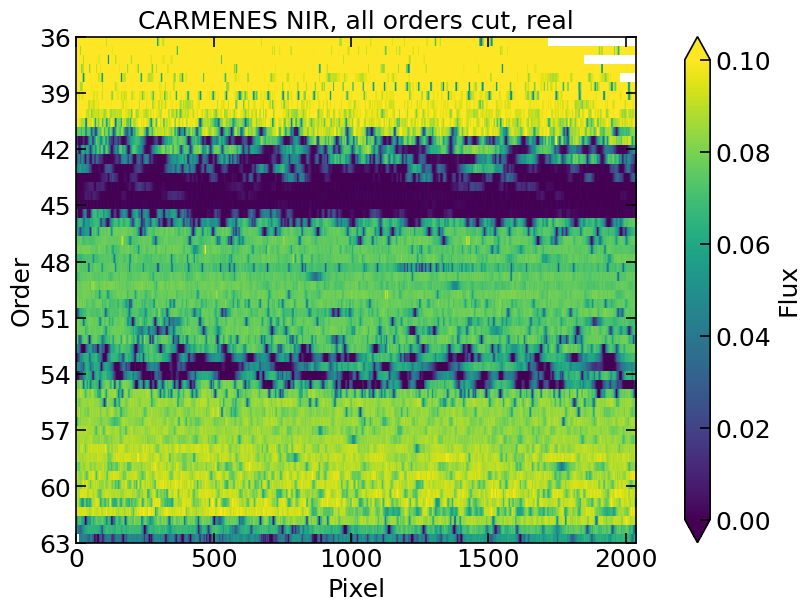

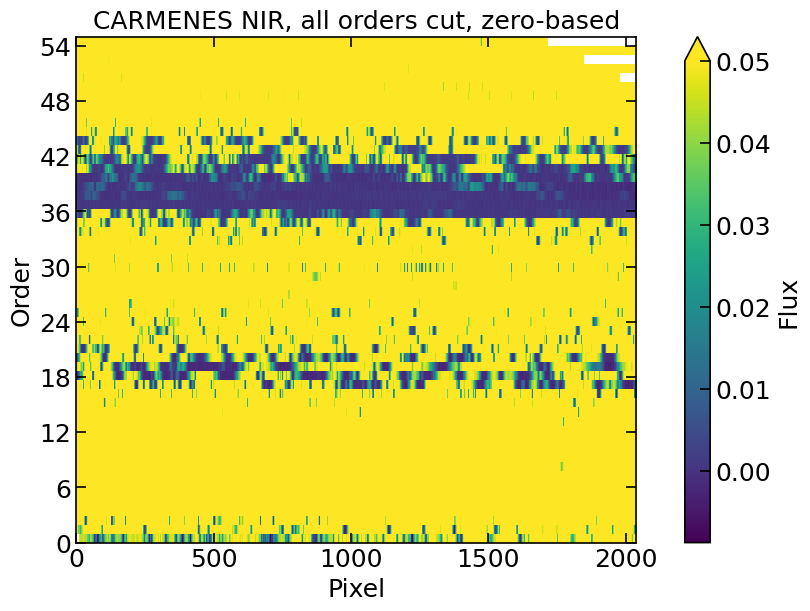

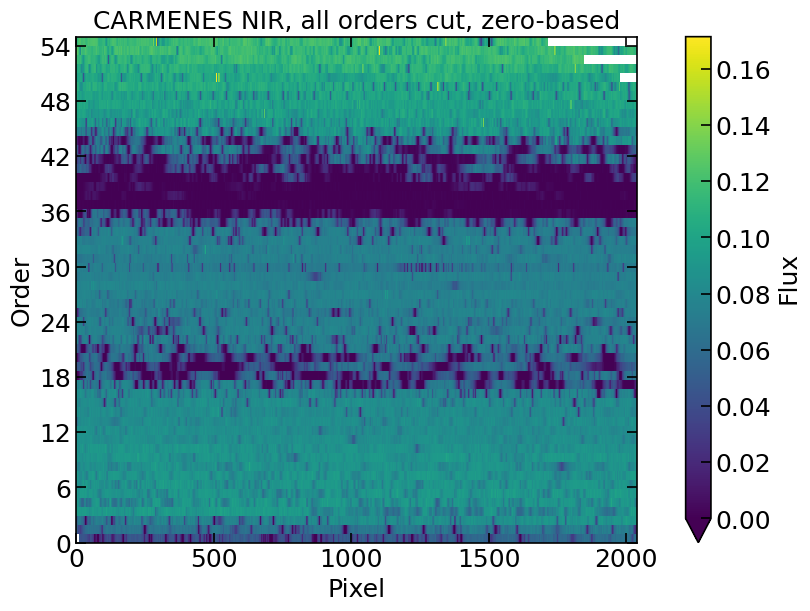

In [9]:
# Map of all orders flux, real orders, and cut in flux
spec.fig_spectrum_map(ordtype='real', vmin=0, vmax=0.1, title='CARMENES NIR, all orders cut, real', sh=True, sv=False)

spec.fig_spectrum_map(ordtype='zero', vmax=0.05, title='CARMENES NIR, all orders cut, zero-based', sh=True, sv=False)

spec.fig_spectrum_map(ordtype='zero', vmin=0, title='CARMENES NIR, all orders cut, zero-based', sh=True, sv=False)

Plot orders map, cut orders.

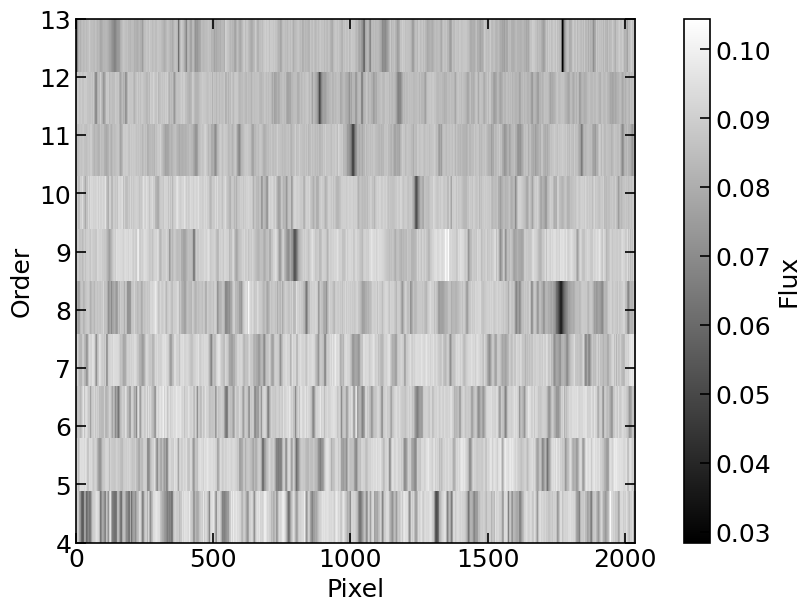

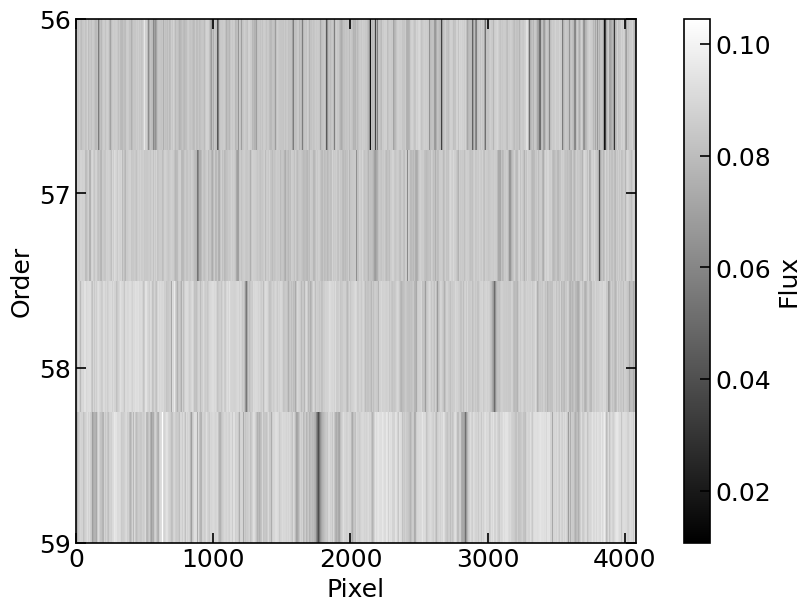

In [10]:
# Map of some orders
spec.fig_spectrum_map(ords=np.arange(4, 14, 1), ordtype='zero', cmap='gray', sh=True, sv=False)
spec_nocut.fig_spectrum_map(ords=np.arange(4, 8, 1), ordtype='real', cmap='gray', sh=True, sv=False)

Plot orders map, cut orders and  pixels

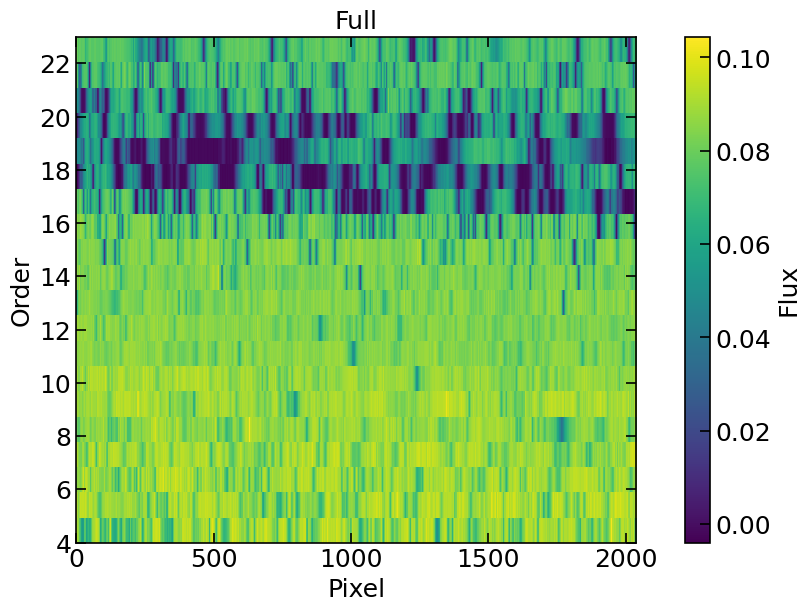

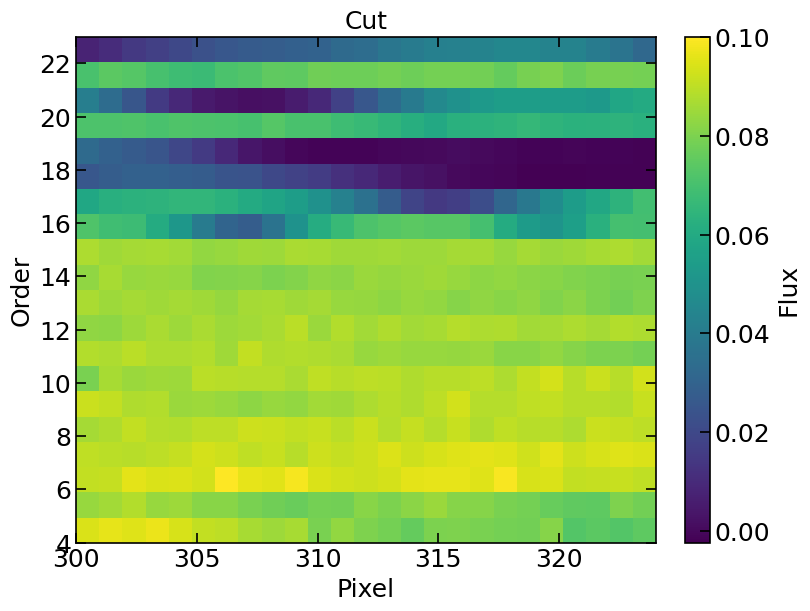

In [11]:
# Map of some pixels
spec.fig_spectrum_map(ords=np.arange(4, 24, 1), ordtype='zero', title='Full', sh=True, sv=False)
spec.fig_spectrum_map(ords=np.arange(4, 24, 1), pixs=np.arange(300, 325, 1), ordtype='zero', title='Cut', sh=True, sv=False)

## List of observation CARMENES VIS

In [89]:
lisfilin = [
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20160327T21h25m39s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20160318T22h26m50s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20160411T20h12m48s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20170109T02h38m37s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20170302T20h25m06s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20170412T20h02m25s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20171230T01h42m48s-sci-gtoc-vis_A.fits',
    '/Users/marina/work/data/carmenes_gto/caracal/CARM_VIS/J07446+035/car-20180102T01h14m44s-sci-gtoc-vis_A.fits',
]
inst = 'carmvis'

# Read spectrum from filin
lisspec = spectrum.Spectra(lisfilin, inst, dirout=dirout)

# vars(lisspec)

Plot spectrum of all observations

/Users/marina/anaconda3/envs/popurri/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


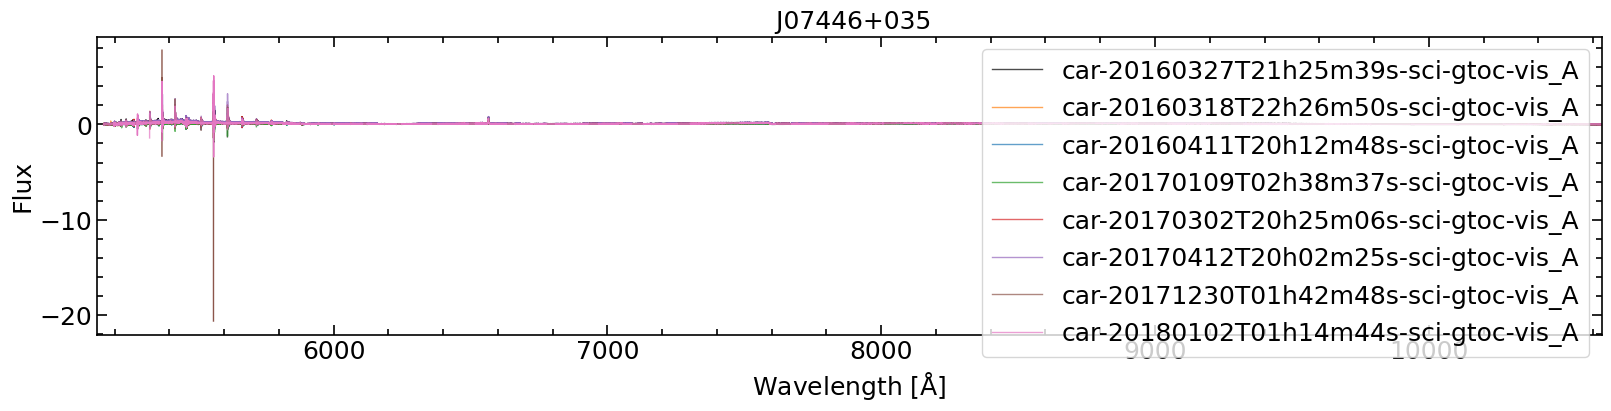

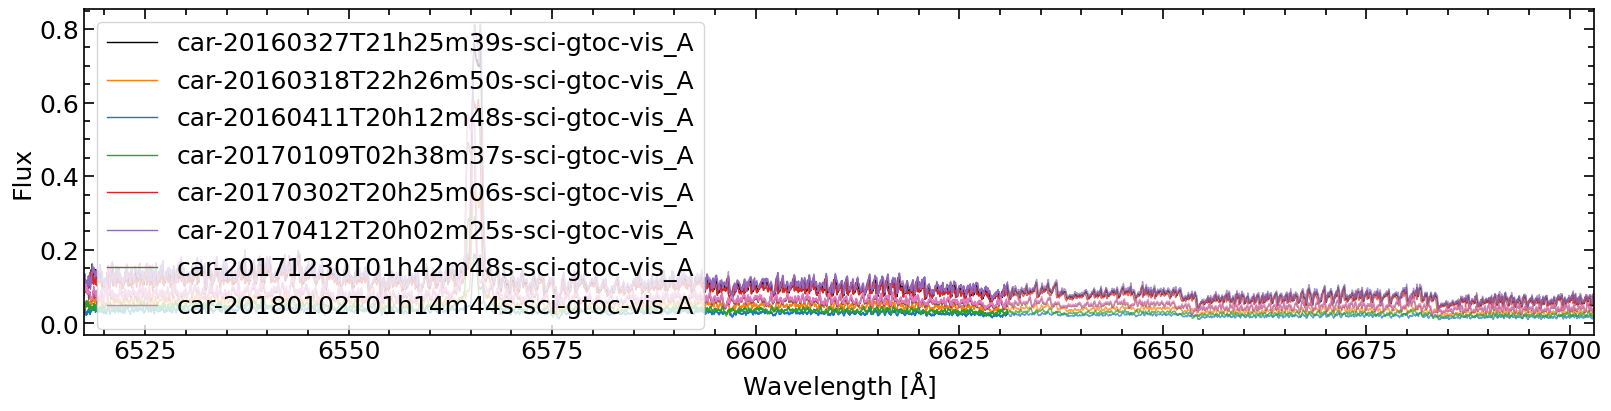

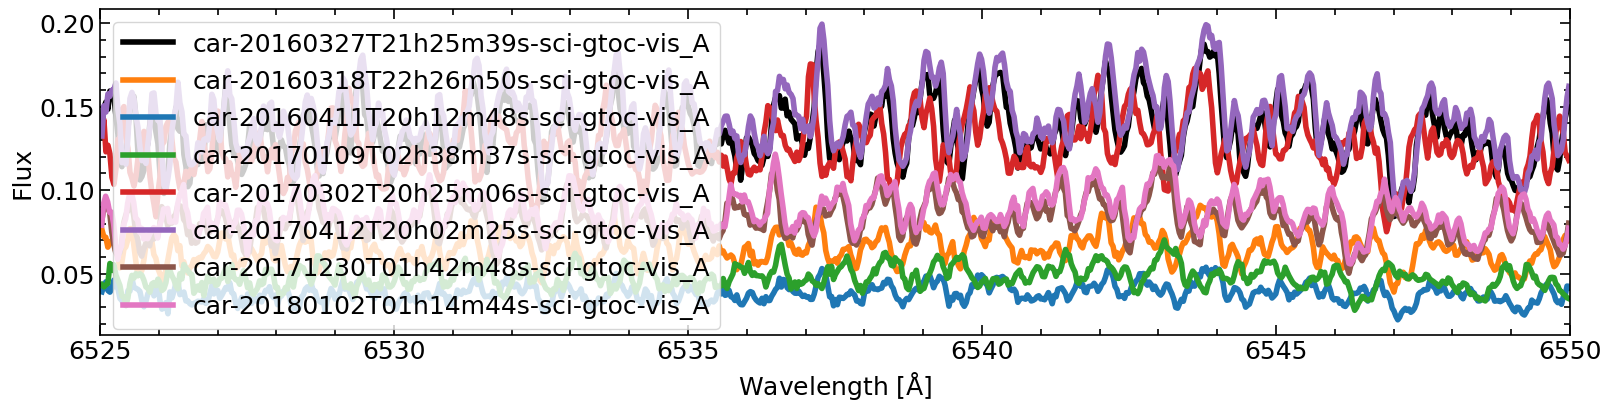

In [103]:
# All orders
lisspec.fig_spectra(legendlabel='obs', sh=True, sv=False, title=lisspec.obj)

# Specific orders `ords`
lisspec.fig_spectra(ords=[25, 26], legendlabel='obs', sh=True, sv=False)

# Specific wavelength range `wmin` and `wmax` (must be within the range of the orders in `ords`, if not nothing will be plotted)
lisspec.fig_spectra(ords=[25, 26], wmin=6525, wmax=6550, legendlabel='obs', sh=True, sv=False, lw=4)

/Users/marina/work/code/popurri/popurri/spectrum.py:669: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cprop_all:
/Users/marina/work/code/popurri/popurri/spectrum.py:681: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in lisspec:


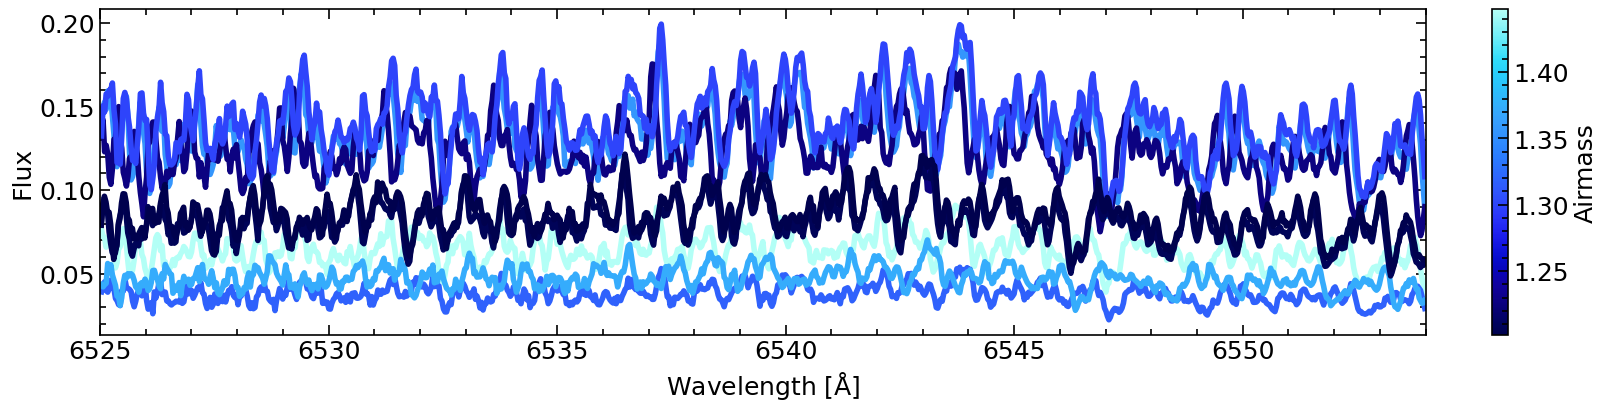

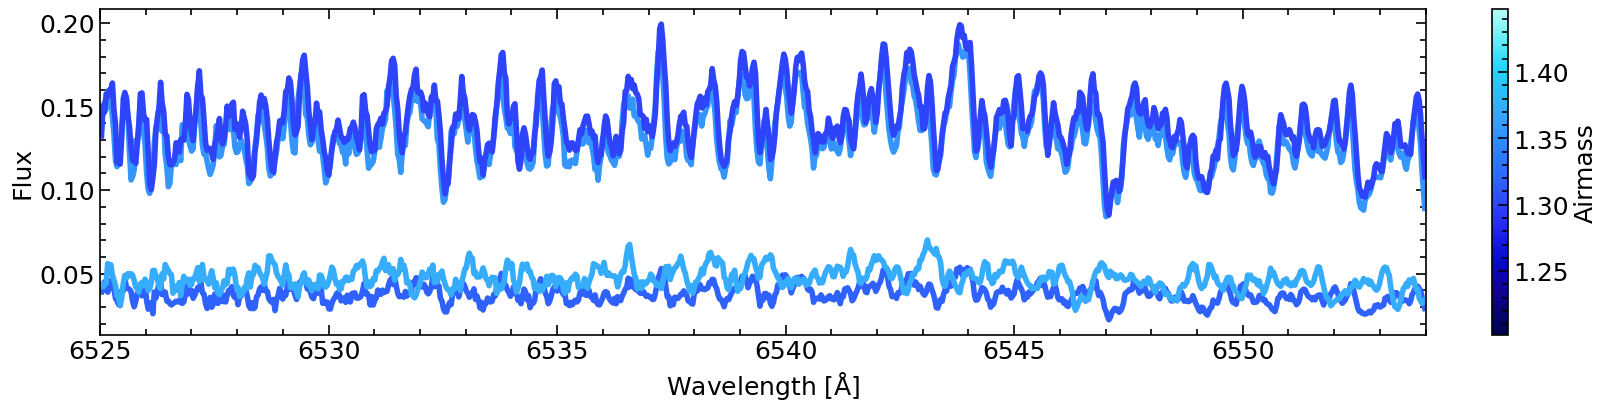

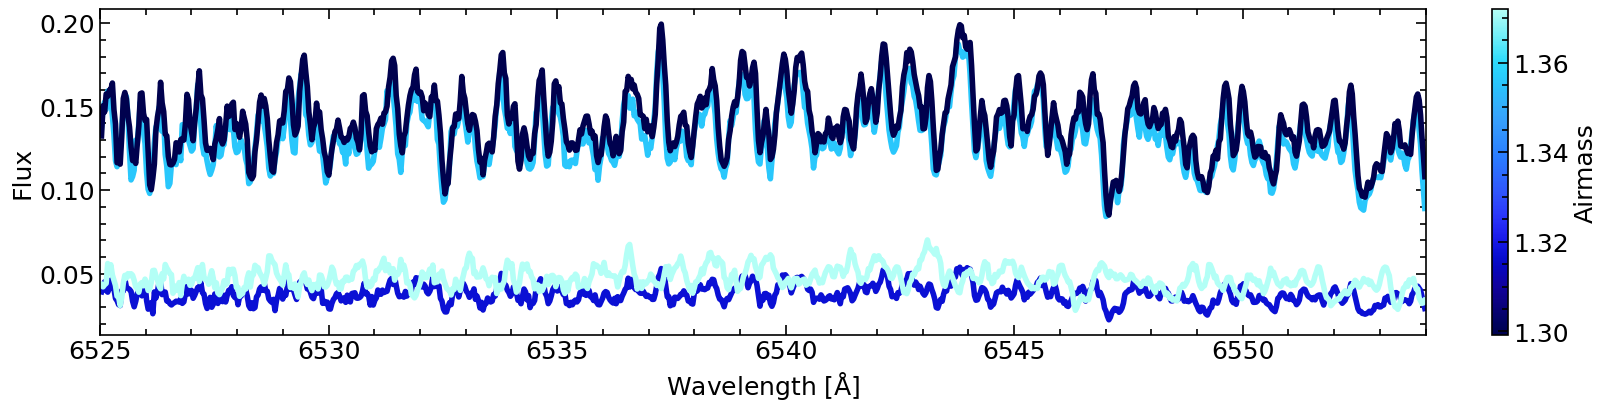

In [106]:
# Plot all observations with colormap of airmass
lisspec.fig_spectra(ords=[25, 26], wmin=6525, wmax=6554, sh=True, sv=False, cmap=cc.cm.kbc, lw=4, cprop=lisspec.dataheader['airmass'], cbarlabel='Airmass')

# Subset of observations, keep colormap of all observations
lisspec.fig_spectra(ords=[25, 26], wmin=6525, wmax=6554, sh=True, sv=False, cmap=cc.cm.kbc, lw=4, cprop=lisspec.dataheader['airmass'], cbarlabel='Airmass', lisspec=[0, 2, 3, 5], cprop_all=True)

# Subset of observations, update colormap to only the subset
lisspec.fig_spectra(ords=[25, 26], wmin=6525, wmax=6554, sh=True, sv=False, cmap=cc.cm.kbc, lw=4, cprop=lisspec.dataheader['airmass'], cbarlabel='Airmass', lisspec=[0, 2, 3, 5])

In [119]:
spec.dataord
# dictsnr = spectrum.get_header_snr(filin, inst)
# dataord = {'snr': spectrum.get_header_snr(filin, inst)}
# pd.DataFrame(dataord)

snr
0   27.5030
1   44.5680
2   49.5400
3   53.8390
4   56.1710
5   60.0530
6   61.8690
7   64.9830
8   63.0160
9   42.8130
10  50.5370
11  69.7990
12  72.3110
13  75.1940
14  76.7840
15  74.9520
16  80.9440
17  76.9190
18   7.4168
19   1.9858
20   3.7664
21  40.7040
22  59.7630
23  79.1620
24  82.5670
25  83.0690
26  81.8440
27  75.2230
28  34.3210
29  42.8770
30  47.6530
31  50.8210
32  53.2720
33  53.8630
34  55.7830
35  57.8130
36  41.9340
37  39.5660
38  52.7460
39  59.8070
40  61.9840
41  67.1700
42  66.6770
43  68.4840
44  68.0690
45  55.6840
46   2.0268
47   1.8734
48  15.1860
49  48.4200
50  60.9510
51  67.1340
52  67.6130
53  67.7250
54  67.7390
55  60.8120

In [120]:
spec.header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11         
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T / FITS dataset may contain extensions            
ECHVERS =              1.00000 / version number of echelle data format          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) 2010A&A...524..A42P            
DETSEC  = '[1:4096,1:2048]'    / [px] xrange and yrange of window               
DETSIZE = '[1:4096,1:2048]'    / [px] x-range, yrange of full frame             
FILENAME= 'car-20160924T05h04m12s-sci-gtoc-nir.fits' / Filename by 1st stage pip
OBJECT  = 'J07446+035'         / telescope target                               
DATE-OBS= '2016-09-24T05:04: